In [132]:
# Libraries
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from operator import itemgetter
import spacy
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser', 'tagger'])  # create NLP object
nlp.max_length = 10000000  # increase max length  
import re

In [8]:
df = pd.read_csv('db_final.txt')

In [10]:
df.head(5)

,Unnamed: 0,session,year,countryID,country_name,region,statement,speaker,speaker_post,indic_id,indic_name,indic_val,income_level,language
0,0,25.0,1970,ALB,Albania,Europe & Central Asia,33: May I first convey to our President the co...,Mr. NAS,NaN,EG.CFT.ACCS.ZS,Access to clean fuels and technologies for coo...,NaN,Upper middle income,French
1,1,25.0,1970,ALB,Albania,Europe & Central Asia,33: May I first convey to our President the co...,Mr. NAS,NaN,EG.ELC.ACCS.ZS,Access to electricity (% of population),NaN,Upper middle income,French
2,2,25.0,1970,ALB,Albania,Europe & Central Asia,33: May I first convey to our President the co...,Mr. NAS,NaN,NY.ADJ.DRES.GN.ZS,Adjusted savings: natural resources depletion ...,NaN,Upper middle income,French
3,3,25.0,1970,ALB,Albania,Europe & Central Asia,33: May I first convey to our President the co...,Mr. NAS,NaN,NY.ADJ.DFOR.GN.ZS,Adjusted savings: net forest depletion (% of GNI),NaN,Upper middle income,French
4,4,25.0,1970,ALB,Albania,Europe & Central Asia,33: May I first convey to our President the co...,Mr. NAS,NaN,AG.LND.AGRI.ZS,Agricultural land (% of land area),44.890511,Upper middle income,French


In [25]:
df_year_country = df[["year", "country_name"]].drop_duplicates()
year_country = df_year_country.values

In [30]:
counts_by_year = Counter()
for row in year_country:
    year = row[0]
    counts_by_year[year] += 1

counts_by_year = sorted(counts_by_year.items(),
                        key=itemgetter(0))

[(1970, 69), (1971, 112), (1972, 122), (1973, 115), (1974, 125), (1975, 122), (1976, 130), (1977, 136), (1978, 137), (1979, 137), (1980, 145), (1981, 139), (1982, 141), (1983, 145), (1984, 145), (1985, 133), (1986, 144), (1987, 148), (1988, 150), (1989, 149), (1990, 153), (1991, 160), (1992, 166), (1993, 175), (1994, 170), (1995, 172), (1996, 181), (1997, 176), (1998, 180), (1999, 180), (2000, 177), (2001, 185), (2002, 186), (2003, 187), (2004, 188), (2005, 182), (2006, 190), (2007, 188), (2008, 189), (2009, 190), (2010, 186), (2011, 190), (2012, 191), (2013, 189), (2014, 190), (2015, 189)]


Text(0.5,1,'Particpating Countries')

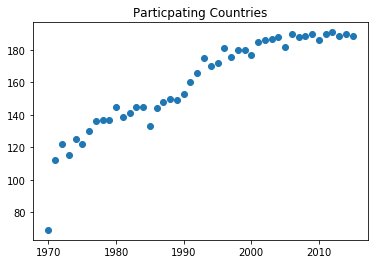

In [60]:
plt.scatter(x = [item[0] for item in counts_by_year], y = [item[1] for item in counts_by_year])
plt.title("Participating Countries")

In [63]:
df_year_speech = df[["year", "statement", "region", "income_level"]].drop_duplicates()
year_speech = df_year_speech.values

In [112]:
region_speech_lengths = Counter()
region_counts = Counter()
year_lengths = Counter()
income_lengths = Counter()
income_counts = Counter()

for row in year_speech:
    year = row[0]
    speech = row[1]
    speech_length = len(speech)
    region = row[2]
    income = row[3]
    region_speech_lengths[region] += speech_length
    region_counts[region] += 1
    income_counts[income] += 1
    year_lengths[year] += speech_length
    income_lengths[income] += speech_length

year_lengths = sorted(year_lengths.items(),
                        key=itemgetter(0))

#plt.hist(speech_lengths, bins = 30, edgecolor = 'black')
#plt.title("Speech Lengths")

In [114]:
income_lengths

Counter({'Upper middle income': 39164682,
         'High income': 38122375,
         'Lower middle income': 31984892,
         'Low income': 22934149})

In [121]:
# Speech length by income and region
regions = [item[0] for item in region_counts.items()]
r_counts = [item[1] for item in region_counts.items()]
incomes = [item[0] for item in income_counts.items()]
i_counts = [item[1] for item in income_counts.items()]
r_speech_lengths = [item[1] for item in region_speech_lengths.items()]
i_speech_lengths = [item[1] for item in income_lengths.items()]

# Speech length by year: divide by number of participating countries
years = [item[0] for item in year_lengths]
country_count = [item[1] for item in counts_by_year]
lengths = [item[1] for item in year_lengths]

# Average speech length by region, income, and year: divide by number of total countries in category
avg_length_region = {region:(length/count) for region,count,length in zip(regions,r_counts,r_speech_lengths)}
avg_length_income = {income:(length/count) for income,count,length in zip(incomes,i_counts,i_speech_lengths)}
avg_length_yr = {yr:(length/n) for yr,length,n in zip(years, lengths, country_count)}

Text(0.5,1,'Average Speech Length by Year')

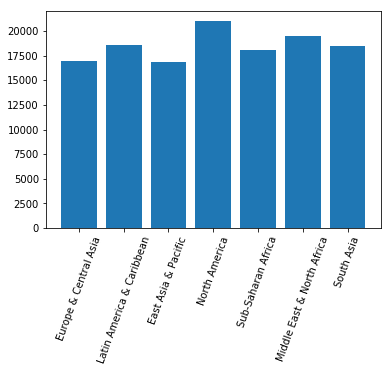

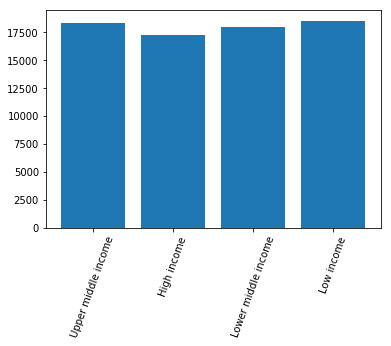

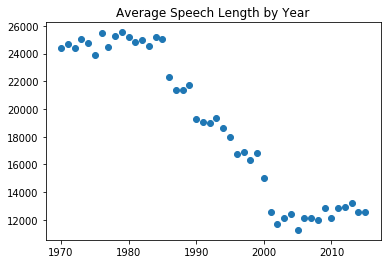

In [125]:
# Speech length by region, (maybe should also add another y axis for number of countries by region group)
plt.bar(x = list(avg_length_region.keys()), height = list(avg_length_region.values()))
plt.xticks(rotation=70)

# Speech length by income, (maybe should also add another y axis for number of countries by income group)
plt.figure()
plt.bar(x = list(avg_length_income.keys()), height = list(avg_length_income.values()))
plt.xticks(rotation = 70)

# Speech length by year
plt.figure()
plt.scatter(x = [item[0] for item in avg_length_yr.items()], y = [item[1] for item in avg_length_yr.items()])
plt.title("Average Speech Length by Year")

In [160]:
# Function for frequency table of words by decade

# Manually added stop words
# These are some of the top words for each decade, but they are not informative
manual_stop_words = ['united', 'nations', 'general', 'assembly', 'international', 'country']

df_year_speech2 = df_year_speech[["year", "statement"]].drop_duplicates().values

def word_count(year_start, year_end):
    word_count_decade = Counter()  # word frequency table by decade
    for row in df_year_speech2:
        year = row[0]
        text = row[1]
        if year >= year_start and year < year_end:        
            parsed_text = nlp(text)
            for token in parsed_text:
                lemma = token.lemma_.lower()
                if re.match('[a-zA-Z]+$', lemma) and len(lemma) > 2 and (not nlp.vocab[lemma].is_stop):#maybe add other stopwords
                    word_count_decade[lemma] += 1
    
    sorted_word_count = sorted(word_count_decade.items(),
                               reverse = True,
                               key = itemgetter(1))
    return sorted_word_count[:50]

In [ ]:
# Word count by decade
word_count_70s = word_count(1970, 1980)
word_count_80s = word_count(1980, 1990)
word_count_90s = word_count(1990, 2000)
word_count_00s = word_count(2000, 2010)
word_count_10s = word_count(2010, 2020)

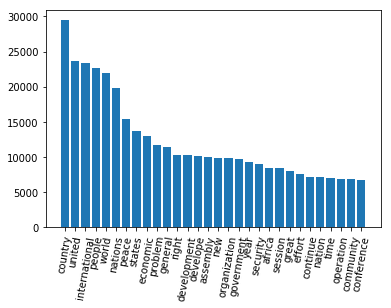

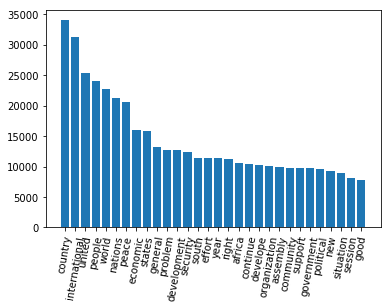

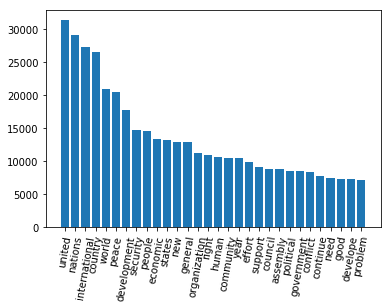

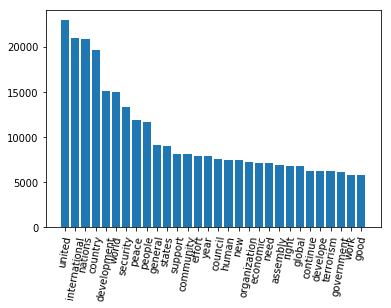

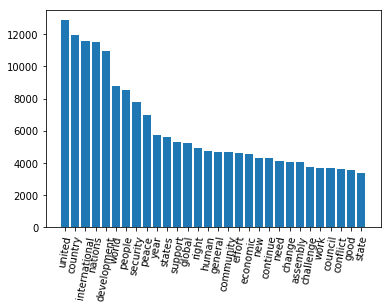

<Figure size 432x288 with 0 Axes>

In [175]:
# Plot histogram of word counts by decade, top 30 words
# Should we try to make a stacked bar chart?
word_count_decades = [word_count_70s, word_count_80s, word_count_90s, word_count_00s, word_count_10s]
for decade in word_count_decades:
    plt.bar(x = [item[0] for item in decade[:30]], height = [item[1] for item in decade[:30]])
    plt.xticks(rotation=80)
    plt.figure()